# Assignments by Felix Vernieuwe

---
---

## Assignment 1: Exploratory Data Analysis
---
---

In [2]:
# Import required libraries
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
# Seaborn setup
sns.set_theme(style="whitegrid")

In [4]:
# Load datasets (prefer usage of dask for loading large datasets)
from dask.diagnostics import ProgressBar
def load_dataset(path) -> pd.DataFrame:
    with ProgressBar():
        return dd.read_csv(path, sep=',', dtype='object').compute()

articles = load_dataset('../data/articles.csv')
customers = load_dataset('../data/customers.csv')
transactions = load_dataset('../data/transactions_train.csv')

[########################################] | 100% Completed | 473.47 ms
[########################################] | 100% Completed | 1.99 ss
[########################################] | 100% Completed | 17.47 s


In [5]:
# Size inspection
print('Articles | Columns: {} | Rows: {}'.format(articles.shape[1], articles.shape[0]))
print('Customers | Columns: {} | Rows: {}'.format(customers.shape[1], customers.shape[0]))
print('Transactions | Columns: {} | Rows: {}'.format(transactions.shape[1], transactions.shape[0]))

Articles | Columns: 25 | Rows: 105542
Customers | Columns: 7 | Rows: 1371980
Transactions | Columns: 5 | Rows: 31788324


---
### Articles
---
<br>

#### Initial Inspection

In [6]:
# Articles initial inspection
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,09,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,09,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0953450001,0953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,09,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,0953763001,0953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,09,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,0956217002,0956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,09,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,0957375001,0957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,09,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


**Column descriptions**
- *General*: General identification information
    - `article_id`: Unique identifier for each specific article (not necessarily unique to a product, there are different sku's for same product) (`10 DIGIT CODE`)
    - `product_code`: Unique product code for each article (`6 DIGIT CODE`)
    - `prod_name`: Name of the article (for some reason, authors decided to use a shorthand) (`STRING`)
- *Category*: Clothing category of the product
    - `product_type_no`: Unique identifier for each category (`3 DIGIT CODE`)
    - `product_type_name`: Name of the category (`STRING`, `CATEGORICAL`)
    - `product_group_name`: Super-category name of the category (`STRING`, `CATEGORICAL`)
- *Appearance*: Appearance information of the sku
    - *Graphical Appearance*: Textual description of the graphical appearance of the article 
        - `graphical_appearance_no`: Unique identifier for the graphical appearance (`7 DIGIT CODE`)
        - `graphical_appearance_name`: Visual description of the clothing material (`STRING`, `CATEGORICAL`)
    - *Colour*: Colour information of the article, describes the primary colour of the article
        - `colour_group_code`: Unique identifier for each colour (`2 DIGIT CODE`)
        - `colour_group_name`: Name of the colour group (`STRING`, `CATEGORICAL`)
    - *Perceived Colour*: A brightness description of the colour of the article
        - `perceived_colour_value_id`: Unique identifier for each perceived colour (`1 DIGIT CODE`)
        - `perceived_colour_value_name`: Name of the perceived colour on a bright to dark scale (`STRING`, `CATEGORICAL`)
    - *Primary Colour*: A more holistic description of the colour of the article
        - `perceived_colour_master_id`: Unique identifier for each primary colour group (`2 DIGIT CODE`)
        - `perceived_colour_master_name`: Name of the primary colour group (`STRING`, `CATEGORICAL`)
- *Department*: Information on the department the article belongs to
    - `department_no`: Unique identifier for each department (`4 DIGIT CODE`)
    - `department_name`: Name of the department (`STRING`, `CATEGORICAL`)
- *Index*: How the article is indexed internally
    - `index_code`: Unique identifier for each index (`1 ALPHABETIC CODE`)
    - `index_name`: Name of the index (`STRING`, `CATEGORICAL`)
    - `index_group_no`: Unique identifier for each super-index (`2 DIGIT CODE`)
    - `index_group_name`: Name of the super-index (`STRING`, `CATEGORICAL`)
- *Section*: To which section the article belongs
    - `section_no`: Unique identifier for each section (`2 DIGIT CODE`)
    - `section_name`: Name of the section (`STRING`, `CATEGORICAL`)
- *Garment Group*: Information on the specific garment group the article belongs to
    - `garment_group_no`: Unique identifier for each garment group (`4 DIGIT CODE`, prefix `10`)
    - `garment_group_name`: Name of the garment group (`STRING`, `CATEGORICAL`)
- *Detail*
    - `detail_desc`: Description of the article (`STRING`) 

#### Contents

In [7]:
# Amount of unique products
print('Unique products: {}'.format(articles['product_code'].nunique()))

# Amount of unique sku's
print('Unique sku\'s: {}'.format(articles['article_id'].nunique()))

# Average amount of sku's per product
print('Average amount of sku\'s per product: {}'.format(
    articles['article_id'].nunique() / articles['product_code'].nunique()))

Unique products: 47224
Unique sku's: 105542
Average amount of sku's per product: 2.2349229205488736


In [8]:
# Listing all different categories
is_categorical = ['product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']

articles[is_categorical].nunique()

product_type_name               131
product_group_name               19
graphical_appearance_name        30
colour_group_name                50
perceived_colour_value_name       8
perceived_colour_master_name     20
department_name                 250
index_name                       10
index_group_name                  5
section_name                     56
garment_group_name               21
dtype: int64

In [9]:
# Listing all categories for each categorical column

from IPython.display import Markdown, display
for category in is_categorical:
    display(Markdown('<h4>Categories for {}</h4><br><h6>{}</h6>'.format(category, sorted(articles[category].unique()))))

<h4>Categories for product_type_name</h4><br><h6>['Accessories set', 'Alice band', 'Baby Bib', 'Backpack', 'Bag', 'Ballerinas', 'Beanie', 'Belt', 'Bikini top', 'Blanket', 'Blazer', 'Blouse', 'Bodysuit', 'Bootie', 'Boots', 'Bra', 'Bra extender', 'Bracelet', 'Braces', 'Bucket hat', 'Bumbag', 'Cap', 'Cap/peaked', 'Cardigan', 'Chem. cosmetics', 'Clothing mist', 'Coat', 'Costumes', 'Cross-body bag', 'Cushion', 'Dog Wear', 'Dog wear', 'Dress', 'Dungarees', 'Earring', 'Earrings', 'Eyeglasses', 'Felt hat', 'Fine cosmetics', 'Flat shoe', 'Flat shoes', 'Flip flop', 'Garment Set', 'Giftbox', 'Gloves', 'Hair clip', 'Hair string', 'Hair ties', 'Hair/alice band', 'Hairband', 'Hat/beanie', 'Hat/brim', 'Headband', 'Heeled sandals', 'Heels', 'Hoodie', 'Jacket', 'Jumpsuit/Playsuit', 'Keychain', 'Kids Underwear top', 'Leg warmers', 'Leggings/Tights', 'Long John', 'Marker pen', 'Mobile case', 'Moccasins', 'Necklace', 'Night gown', 'Nipple covers', 'Other accessories', 'Other shoe', 'Outdoor Waistcoat', 'Outdoor overall', 'Outdoor trousers', 'Polo shirt', 'Pre-walkers', 'Pumps', 'Pyjama bottom', 'Pyjama jumpsuit/playsuit', 'Pyjama set', 'Ring', 'Robe', 'Sandals', 'Sarong', 'Scarf', 'Sewing kit', 'Shirt', 'Shorts', 'Shoulder bag', 'Side table', 'Skirt', 'Sleep Bag', 'Sleeping sack', 'Slippers', 'Sneakers', 'Socks', 'Soft Toys', 'Stain remover spray', 'Straw hat', 'Sunglasses', 'Sweater', 'Swimsuit', 'Swimwear bottom', 'Swimwear set', 'Swimwear top', 'T-shirt', 'Tailored Waistcoat', 'Tie', 'Top', 'Tote bag', 'Towel', 'Toy', 'Trousers', 'Umbrella', 'Underdress', 'Underwear Tights', 'Underwear body', 'Underwear bottom', 'Underwear corset', 'Underwear set', 'Unknown', 'Vest top', 'Wallet', 'Washing bag', 'Watch', 'Waterbottle', 'Wedge', 'Weekend/Gym bag', 'Wireless earphone case', 'Wood balls', 'Zipper head']</h6>

<h4>Categories for product_group_name</h4><br><h6>['Accessories', 'Bags', 'Cosmetic', 'Fun', 'Furniture', 'Garment Full body', 'Garment Lower body', 'Garment Upper body', 'Garment and Shoe care', 'Interior textile', 'Items', 'Nightwear', 'Shoes', 'Socks & Tights', 'Stationery', 'Swimwear', 'Underwear', 'Underwear/nightwear', 'Unknown']</h6>

<h4>Categories for graphical_appearance_name</h4><br><h6>['All over pattern', 'Application/3D', 'Argyle', 'Chambray', 'Check', 'Colour blocking', 'Contrast', 'Denim', 'Dot', 'Embroidery', 'Front print', 'Glittering/Metallic', 'Hologram', 'Jacquard', 'Lace', 'Melange', 'Mesh', 'Metallic', 'Mixed solid/pattern', 'Neps', 'Other pattern', 'Other structure', 'Placement print', 'Sequin', 'Slub', 'Solid', 'Stripe', 'Transparent', 'Treatment', 'Unknown']</h6>

<h4>Categories for colour_group_name</h4><br><h6>['Beige', 'Black', 'Blue', 'Bronze/Copper', 'Dark Beige', 'Dark Blue', 'Dark Green', 'Dark Grey', 'Dark Orange', 'Dark Pink', 'Dark Purple', 'Dark Red', 'Dark Turquoise', 'Dark Yellow', 'Gold', 'Green', 'Greenish Khaki', 'Grey', 'Greyish Beige', 'Light Beige', 'Light Blue', 'Light Green', 'Light Grey', 'Light Orange', 'Light Pink', 'Light Purple', 'Light Red', 'Light Turquoise', 'Light Yellow', 'Off White', 'Orange', 'Other', 'Other Blue', 'Other Green', 'Other Orange', 'Other Pink', 'Other Purple', 'Other Red', 'Other Turquoise', 'Other Yellow', 'Pink', 'Purple', 'Red', 'Silver', 'Transparent', 'Turquoise', 'Unknown', 'White', 'Yellow', 'Yellowish Brown']</h6>

<h4>Categories for perceived_colour_value_name</h4><br><h6>['Bright', 'Dark', 'Dusty Light', 'Light', 'Medium', 'Medium Dusty', 'Undefined', 'Unknown']</h6>

<h4>Categories for perceived_colour_master_name</h4><br><h6>['Beige', 'Black', 'Blue', 'Bluish Green', 'Brown', 'Green', 'Grey', 'Khaki green', 'Lilac Purple', 'Metal', 'Mole', 'Orange', 'Pink', 'Red', 'Turquoise', 'Unknown', 'White', 'Yellow', 'Yellowish Green', 'undefined']</h6>

<h4>Categories for department_name</h4><br><h6>['AK Bottoms', 'AK Dresses & Outdoor', 'AK Other', 'AK Tops Jersey & Woven', 'AK Tops Knitwear', 'Accessories', 'Accessories Boys', 'Accessories Other', 'Asia Assortment', 'Baby Boy Jersey Fancy', 'Baby Boy Knitwear', 'Baby Boy Local Relevance', 'Baby Boy Outdoor', 'Baby Boy Woven', 'Baby Exclusive', 'Baby Girl Jersey Fancy', 'Baby Girl Knitwear', 'Baby Girl Local Relevance', 'Baby Girl Outdoor', 'Baby Girl Woven', 'Baby Nightwear', 'Baby Shoes', 'Baby Socks', 'Baby Toys/Acc', 'Baby basics', 'Bags', 'Bags & Items', 'Basic 1', 'Basics', 'Belts', 'Blanks', 'Blazer', 'Blazer S&T', 'Blouse', 'Blouse & Dress', 'Boots', 'Bottoms', 'Bottoms Boys', 'Bottoms Girls', 'Boys Local Relevance', 'Boys Small Acc & Bags', 'Campaigns', 'Casual Lingerie', 'Clean Lingerie', 'Conscious Exclusive', 'Denim Other Garments', 'Denim Trousers', 'Denim shorts', 'Denim trousers', 'Denim wardrobe H&M man inactive from S.6', 'Divided Shoes', 'Divided Swimwear', 'Divided+', 'Divided+ inactive from s.1', 'Dress', 'Dress-up Boys', 'Dresses', 'Dresses DS', 'EQ & Special Collections', 'EQ Divided Basics', 'EQ Divided Blue', 'EQ H&M Man', 'EQ Ladies Denim', 'Equatorial', 'Equatorial Assortment', 'Everyday Waredrobe Denim', 'Expressive Lingerie', 'Flats', 'Functional Lingerie', 'Girls Local Relevance', 'Girls Projects', 'Girls Small Acc/Bags', 'Gloves/Hats', 'Hair Accessories', 'Heavy Basic Jersey', 'Heels', 'Jacket', 'Jacket Casual', 'Jacket Smart', 'Jacket Street', 'Jackets', 'Jersey', 'Jersey Basic', 'Jersey Fancy', 'Jersey Fancy DS', 'Jersey License', 'Jersey Occasion', 'Jersey fancy', 'Jersey inactive from S.6', 'Jersey inactive from s1', 'Jersey/Knitwear Premium', 'Jewellery', 'Jewellery Extended', 'Kids Boy Big Acc', 'Kids Boy Denim', 'Kids Boy Exclusive', 'Kids Boy Jersey Basic', 'Kids Boy Jersey Fancy', 'Kids Boy Knitwear', 'Kids Boy License', 'Kids Boy Outdoor', 'Kids Boy Shirt', 'Kids Boy Shoes', 'Kids Boy Shorts', 'Kids Boy Socks', 'Kids Boy Swimwear', 'Kids Boy Trouser', 'Kids Boy UW/NW', 'Kids Dress-up/Football', 'Kids Girl Big Acc', 'Kids Girl Denim', 'Kids Girl Dresses', 'Kids Girl Exclusive', 'Kids Girl Jersey Basic', 'Kids Girl Jersey Fancy', 'Kids Girl Knitwear', 'Kids Girl License', 'Kids Girl Outdoor', 'Kids Girl S&T', 'Kids Girl Shoes', 'Kids Girl Swimwear', 'Kids Girl Trouser', 'Kids Girl UW/NW', 'Knit & Woven', 'Knitwear', 'Knitwear Basic', 'Knitwear inactive from s1', 'Ladies Sport Acc', 'Ladies Sport Bottoms', 'Ladies Sport Bras', 'Ladies Sport Woven', 'License', 'Light Basic Jersey', 'Limited Edition', 'Local relevance', 'Loungewear', 'Mama Lingerie', 'Men Sport Acc', 'Men Sport Bottoms', 'Men Sport Tops', 'Men Sport Woven', 'Newborn', 'Nightwear', 'Nursing', 'OL Extended Sizes', 'On Demand', 'Other Accessories', 'Other items', 'Outdoor inactive from s1', 'Outdoor/Blazers', 'Outdoor/Blazers DS', 'Outwear', 'Outwear & Blazers', 'Premium Quality', 'Price Items', 'Projects', 'Projects Dresses', 'Projects Jersey & Knitwear', 'Projects Woven Bottoms', 'Projects Woven Tops', 'Promotion / Other / Offer', 'Promotion/ Other /Offer', 'Promotion/Other/Offer', 'Read & React', 'Scarves', 'Shirt', 'Shirt Extended inactive from s1', 'Shirt S&T', 'Shoes', 'Shoes / Boots inactive from s5', 'Shoes Other', 'Shopbasket Lingerie', 'Shopbasket Socks', 'Shorts', 'Shorts & Skirts', 'Shorts DS', 'Skirt', 'Skirts', 'Skirts DS', 'Small Acc. Jewellery & Other', 'Small Accessories', 'Small Accessories Extended', 'Small Bags', 'Sneakers', 'Sneakers big girl inactive from s2', 'Sneakers small girl inactive from s2', 'Socks', 'Socks Bin', 'Socks Wall', 'Special Collection', 'Studio Collection', 'Suit', 'Suit Extended inactive from s1', 'Suit jacket', 'Sunglasses', 'Swimwear', 'Take Care External', 'Take care', 'Test Ladies', 'Tights basic', 'Tops & Bottoms Other', 'Tops Boys', 'Tops Fancy Jersey', 'Tops Girls', 'Tops Knitwear', 'Tops Knitwear DS', 'Tops Woven', 'Tops woven DS', 'Trouser', 'Trouser S&T', 'Trousers', 'Trousers & Skirt', 'Trousers DS', 'UW', 'Underwear Jersey', 'Underwear Jersey Fancy inactive from s1', 'Underwear Woven', 'Woven', 'Woven Occasion', 'Woven Premium', 'Woven Tops', 'Woven bottoms', 'Woven bottoms inactive from S.7', 'Woven inactive from s1', 'Woven top', 'Young Boy Big Acc', 'Young Boy Denim', 'Young Boy Jersey Basic', 'Young Boy Jersey Fancy', 'Young Boy Knitwear', 'Young Boy Outdoor', 'Young Boy Shirt', 'Young Boy Shoes', 'Young Boy Shorts', 'Young Boy Socks', 'Young Boy Trouser', 'Young Boy UW/NW', 'Young Girl Big Acc', 'Young Girl Denim', 'Young Girl Dresses', 'Young Girl Jersey Basic', 'Young Girl Jersey Fancy', 'Young Girl Knitwear', 'Young Girl Outdoor', 'Young Girl S&T', 'Young Girl Shoes', 'Young Girl Swimwear', 'Young Girl Trouser', 'Young Girl UW/NW', 'Young boy Swimwear']</h6>

<h4>Categories for index_name</h4><br><h6>['Baby Sizes 50-98', 'Children Accessories, Swimwear', 'Children Sizes 134-170', 'Children Sizes 92-140', 'Divided', 'Ladies Accessories', 'Ladieswear', 'Lingeries/Tights', 'Menswear', 'Sport']</h6>

<h4>Categories for index_group_name</h4><br><h6>['Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport']</h6>

<h4>Categories for section_name</h4><br><h6>['Baby Boy', 'Baby Essentials & Complements', 'Baby Girl', 'Boys Underwear & Basics', 'Collaborations', 'Contemporary Casual', 'Contemporary Smart', 'Contemporary Street', 'Denim Men', 'Divided Accessories', 'Divided Asia keys', 'Divided Basics', 'Divided Collection', 'Divided Complements Other', 'Divided Projects', 'Divided Selected', 'EQ Divided', 'Girls Underwear & Basics', 'H&M+', 'Kids & Baby Shoes', 'Kids Accessories, Swimwear & D', 'Kids Boy', 'Kids Girl', 'Kids Local Relevance', 'Kids Outerwear', 'Kids Sports', 'Ladies Denim', 'Ladies H&M Sport', 'Ladies Other', 'Mama', 'Men Accessories', 'Men Edition', 'Men H&M Sport', 'Men Other', 'Men Other 2', 'Men Project', 'Men Shoes', 'Men Suits & Tailoring', 'Men Underwear', 'Mens Outerwear', 'Special Collections', 'Womens Big accessories', 'Womens Casual', 'Womens Everyday Basics', 'Womens Everyday Collection', 'Womens Jackets', 'Womens Lingerie', 'Womens Nightwear, Socks & Tigh', 'Womens Premium', 'Womens Shoes', 'Womens Small accessories', 'Womens Swimwear, beachwear', 'Womens Tailoring', 'Womens Trend', 'Young Boy', 'Young Girl']</h6>

<h4>Categories for garment_group_name</h4><br><h6>['Accessories', 'Blouses', 'Dressed', 'Dresses Ladies', 'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear', 'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts', 'Socks and Tights', 'Special Offers', 'Swimwear', 'Trousers', 'Trousers Denim', 'Under-, Nightwear', 'Unknown', 'Woven/Jersey/Knitted mix Baby']</h6>

#### Missing values

In [10]:
# List columns with missing values
articles[articles.columns[articles.isna().any()]].isna().sum()

detail_desc    416
dtype: int64

In [11]:
# List rows with missing values in `detail_desc`
articles[articles['detail_desc'].isna()]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,0351332007,0351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,07,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,0420049002,0420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,0420049003,0420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,0426199002,0426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,09,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,0426199010,0426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,08,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,0752458001,0752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,...,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,0768842001,0768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,0768842004,0768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,0856985001,0856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,...,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


The only column with missing values, is `detail_desc` (416 missing values). Luckily, the descriptions don't necessarily contain critical information -- mostly descriptions about feel, fit and the make.

As a quick sanity check, it might be prudent to also check whether there are empty strings anywhere in the dataset.

In [12]:
# List columns with empty strings
articles[articles.columns[articles.eq('').any()]].eq('').sum()

Series([], dtype: float64)

In the previous section, there are also some columns that have 'Unknown' and 'Other' as categories, since these do not provide any information, it would be nice to quantify how many of these there are.

In [13]:
# List columns with 'Unknown' or 'Other' as category
articles[articles.columns[articles.isin(['Unknown', 'Other', 'undefined']).any()]].isin(['Unknown', 'Other', 'undefined']).sum()

product_type_name                121
product_group_name               121
graphical_appearance_name         52
colour_group_name                133
perceived_colour_value_name       28
perceived_colour_master_name     790
garment_group_name              3873
dtype: int64

In [14]:
# List all rows with 'Unknown' or 'Other' as category in any column
articles[articles.isin(['Unknown', 'Other', 'undefined']).any(axis=1)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
64,0156224002,0156224,Box 4p Socks,-1,Unknown,Unknown,1010016,Solid,09,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
257,0212042036,0212042,Mimmi sneaker,94,Sneakers,Shoes,1010016,Solid,01,Other,...,Divided Shoes,D,Divided,2,Divided,52,Divided Accessories,1020,Shoes,Cotton trainers with closed lacing and a loop ...
866,0299733008,0299733,Hilton,265,Dress,Garment Full body,1010016,Solid,01,Other,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Strapless jersey dress with an elasticated wai...
1095,0316657008,0316657,Karenina Jacket,262,Jacket,Garment Upper body,1010016,Solid,07,Grey,...,Outdoor/Blazers DS,D,Divided,2,Divided,58,Divided Selected,1007,Outdoor,Biker jacket in imitation leather with a diago...
1099,0317055012,0317055,Racer Tank Fancy License,253,Vest top,Garment Upper body,-1,Unknown,09,Black,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,"Vest top in cotton jersey with worn details, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105473,0943256001,0943256,SC NET TIGHTS,304,Underwear Tights,Socks & Tights,1010016,Solid,82,Turquoise,...,Studio Collection,A,Ladieswear,1,Ladieswear,82,Special Collections,1001,Unknown,Studio Collection. Fishnet tights with an elas...
105488,0945304001,0945304,TEMPEST SWEATER,252,Sweater,Garment Upper body,1010018,Treatment,09,Black,...,Baby Boy Jersey Fancy,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1005,Jersey Fancy,Top in lightweight sweatshirt fabric made from...
105494,0946387001,0946387,DIV+ Marsh dress W,265,Dress,Garment Full body,1010004,Check,43,Dark Red,...,Divided+,D,Divided,2,Divided,50,Divided Projects,1001,Unknown,"Short, A-line dress in cotton flannel with a d..."
105527,0949143001,0949143,SC REBEL knit sweater,252,Sweater,Garment Upper body,1010016,Solid,09,Black,...,Studio Collection,A,Ladieswear,1,Ladieswear,82,Special Collections,1001,Unknown,Studio Collection. Straight-style jumper in a ...


Above table shows that there are 4746 rows that contain some kind of unknown information, mostly with regards to the garment group name. It is not necessarily that the product is uncategorizable, but rather that it was never added.

Depending on how the columns get used, extra care should be taken to not use these specific rows (i.e. for colour recognition).

One other note: in general, the strings seems to be formatted as `Title Case`, but sometimes there are lowercase string. As a safety measure, it might be prudent to convert all strings to `Title Case` (or `UPPER CASE`).

#### Distributions

<AxesSubplot: xlabel='count', ylabel='index_group_name'>

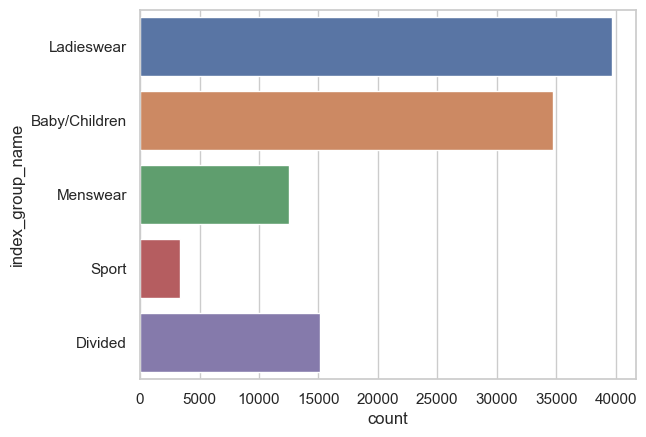

In [15]:
# Target group distribution
sns.countplot(y='index_group_name', data=articles)

Curiously, the catalogue seems to contain many more products targeted to children and women, compared to men. Sports clothing also seem to be underrepresented in the catalogue.

<AxesSubplot: xlabel='count', ylabel='perceived_colour_value_name'>

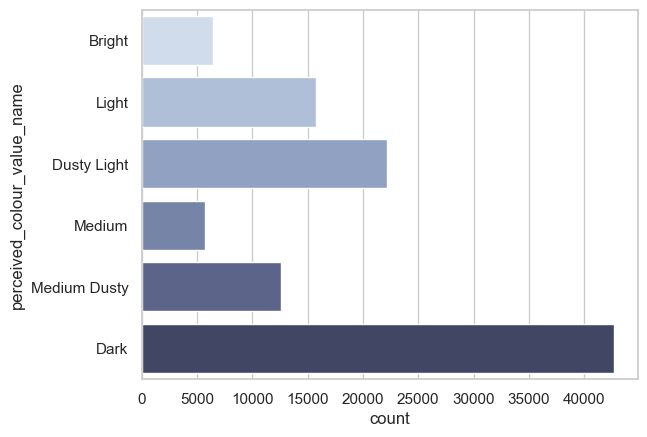

In [16]:
# Clothing brightness distribution
# Discrete Dark to light palette
colors = sns.color_palette("ch:start=.0,rot=-.1", 7)
lightness_sorted = ["Bright", "Light", "Dusty Light", "Medium", "Medium Dusty", "Dark"]
sns.countplot(y='perceived_colour_value_name', data=articles, palette=colors, order=lightness_sorted)

<AxesSubplot: xlabel='count', ylabel='perceived_colour_master_name'>

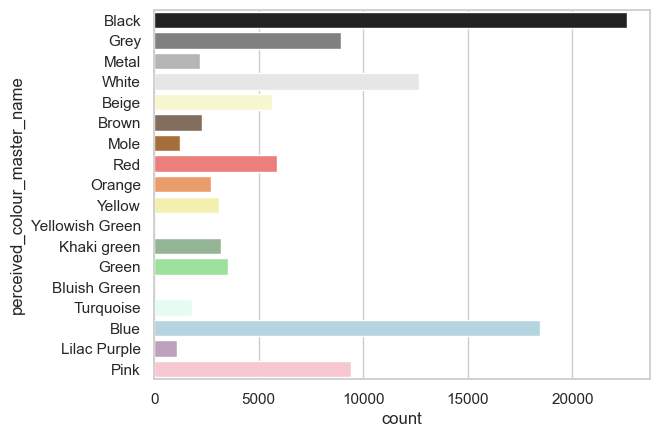

In [17]:
# Regular colour distribution
color_codes = {
    "Black": "#222222",
    "White": "#E6E6E6",
    "Beige": "#FEFCC9",
    "Grey": "#808080",
    "Blue": "#ADD8E6",
    "Pink": "#FFC0CB",
    "Lilac Purple": "#C29DC2",
    "Red": "#FF6E66",
    "Mole": "#B86D29",
    "Orange": "#FF9955",
    "Metal": "#B5B5B5",
    "Brown": "#876E58",
    "Turquoise": "#E4FFF1",
    "Yellow": "#FFFAA3",
    "Khaki green": "#8FBC8F",
    "Green": "#90EE90",
    "Yellowish Green": "#9ACD32",
    "Bluish Green": "#00FA9A"
}

rainbow_sort = [ "Black", "Grey", "Metal", "White", "Beige", "Brown", "Mole",
    "Red", "Orange", "Yellow", "Yellowish Green", "Khaki green", "Green",
    "Bluish Green", "Turquoise", "Blue", "Lilac Purple", "Pink"]
sns.countplot(y='perceived_colour_master_name', data=articles[~articles['perceived_colour_master_name'].isin(['undefined', 'Unknown'])], palette=color_codes, order=rainbow_sort)

Yellowish Green and Bluish Green are almost non-existent in the catalogue. If the colours are going to be used for data analysis in any capacity, it might be prudent to remove them.

<AxesSubplot: xlabel='count', ylabel='colour_group_name'>

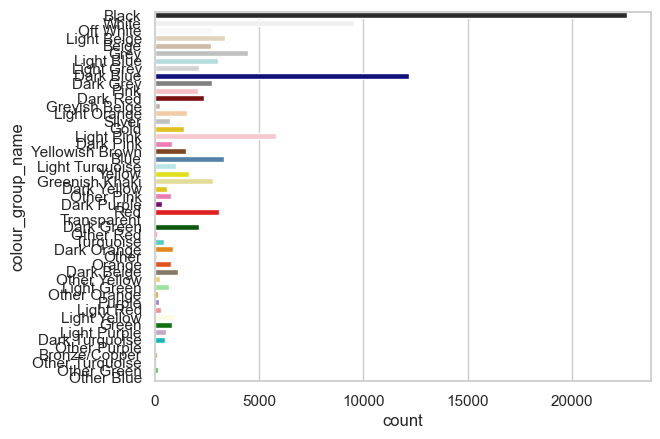

In [18]:
# Color distribution (all)
color_codes = {
    "Black": "#2b2b2b",
    "White": "#f0f0f0",
    "Off White": "#f8f8f8",
    "Light Beige": "#e6d6b8",
    "Beige": "#d3bba1",
    "Grey": "#c0c0c0",
    "Light Blue": "#b0e0e6",
    "Light Grey": "#d3d3d3",
    "Dark Blue": "#00008b",
    "Dark Grey": "#808080",
    "Pink": "#ffb6c1",
    "Dark Red": "#8b0000",
    "Greyish Beige": "#c4aead",
    "Light Orange": "#ffcc99",
    "Silver": "#c0c0c0",
    "Gold": "#ffd700",
    "Light Pink": "#ffc0cb",
    "Dark Pink": "#ff69b4",
    "Yellowish Brown": "#8b4513",
    "Blue": "#4682b4",
    "Light Turquoise": "#afeeee",
    "Yellow": "#ffff00",
    "Greenish Khaki": "#f0e68c",
    "Dark Yellow": "#ffd700",
    "Other Pink": "#ff69b4",
    "Dark Purple": "#800080",
    "Red": "#ff0000",
    "Transparent": "#e6e6fa",
    "Dark Green": "#006400",
    "Other Red": "#ff6347",
    "Turquoise": "#40e0d0",
    "Dark Orange": "#ff8c00",
    "Other": "#d3d3d3",
    "Orange": "#ff4500",
    "Dark Beige": "#8b795e",
    "Other Yellow": "#ffdb58",
    "Light Green": "#90ee90",
    "Other Orange": "#ffa500",
    "Purple": "#9370db",
    "Light Red": "#ff7f7f",
    "Light Yellow": "#ffffe0",
    "Green": "#008000",
    "Light Purple": "#c8a2c8",
    "Dark Turquoise": "#00ced1",
    "Other Purple": "#dda0dd",
    "Bronze/Copper": "#b87333",
    "Other Turquoise": "#00ced1",
    "Other Green": "#32cd32",
    "Other Blue": "#4682b4",
}

sns.countplot(y='colour_group_name', data=articles[~articles['colour_group_name'].isin(['undefined', 'Unknown'])], palette=color_codes)

Not incredibly informative, but it is very satisfying to see the colour distribution of the catalogue. 

And finally, it might be interesting to see what clothing types are most common in the catalogue.

<AxesSubplot: xlabel='count', ylabel='garment_group_name'>

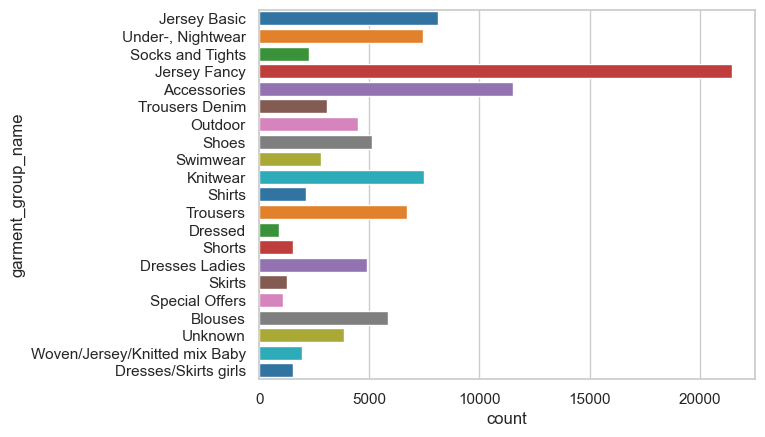

In [19]:
# Clothing type distribution
sns.countplot(y='garment_group_name', data=articles, palette="tab10")

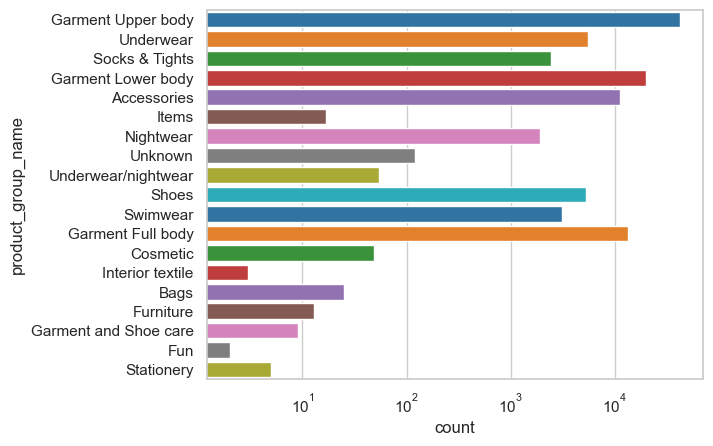

In [20]:
# Product group distribution
g = sns.countplot(y='product_group_name', data=articles, palette="tab10")
g.set_xscale("log")

For the last graph, a log scale was necessary to also visualize the smaller product groups. Upper and lower garments are obviously very prevalent, where categories such as `Fun` is practically non-existent. That might give an indication as to where the priorities of the company lie.

---
### Customers
---
<br>

#### Initial Inspection

In [21]:
# Customers initial inspection
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
457335,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24,7aa399f7e669990daba2d92c577b52237380662f36480b...
457336,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
457337,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
457338,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


**Column descriptions**
- `customer_id`: Unique identifier for each customer (`256b HASH DIGEST AS HEX STRING`)
- `FN`: Fashion News subscriber (`BOOLEAN`)
- `Active`: Active for communication (`BOOLEAN`)
- `club_member_status`: Club member status (`STRING`, `CATEGORICAL`)
- `fashion_news_frequency`: How often the customer wants to receive fashion news (`STRING`, `CATEGORICAL`)
- `age`: Age of the customer (`NUMERIC`)
- `postal_code`: Postal code of the customer (`256b HASH DIGEST AS HEX STRING`)

In [22]:
# Convert select columns back to numberic
numeric = ["FN", "Active", "age"]
customers[numeric] = customers[numeric].apply(pd.to_numeric)

#### Contents

In [23]:
# Amount of unique customers
print('Unique customers: {}'.format(customers['customer_id'].nunique()))

# Amount of customers that are club members
print('Club members: {}'.format(customers['club_member_status'].eq('ACTIVE').sum()))

# Amount of subscribers to fashion news filter nan
print('Fashion news subscribers: {}'.format(customers['FN'].sum()))

Unique customers: 1371980
Club members: 1272491
Fashion news subscribers: 476930.0


In [24]:
# Calculate stats on age of users
customers['age'].describe().apply(lambda x: format(x, 'f'))

count    1356119.000000
mean          36.386965
std           14.313628
min           16.000000
25%           24.000000
50%           32.000000
75%           49.000000
max           99.000000
Name: age, dtype: object

In [25]:
is_categorical = ['club_member_status', 'fashion_news_frequency']

customers[is_categorical].nunique()

club_member_status        3
fashion_news_frequency    4
dtype: int64

In [26]:
# Listing all categories for each categorical column
for category in is_categorical:
    display(Markdown('<h4>Categories for {}</h4><br><h6>{}</h6>'.format(category, sorted(customers[category].dropna().unique()))))

<h4>Categories for club_member_status</h4><br><h6>['ACTIVE', 'LEFT CLUB', 'PRE-CREATE']</h6>

<h4>Categories for fashion_news_frequency</h4><br><h6>['Monthly', 'NONE', 'None', 'Regularly']</h6>

Again, there is mixed usage of `Title Case` and `UPPER CASE`.

#### Missing values
One thing immediate obvious from the initial inspection, is that there are a ton of missing values in the dataframe. Let's quantify that.

In [27]:
# List columns with missing values
customers[customers.columns[customers.isna().any()]].isna().sum()

FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
dtype: int64

On first brush, this might seem very severe. However, there are two things to note:
1. FN, Active, club_member_status all function as boolean indicators. We can hazard a guess that any missing value should be interpreted as `False`. So for FN, Active: 0, for club_member_status: `ACTIVE` (as this is the most prevalent value), and for fashion_news_frequency: `NONE`.
2. Furthermore, none of these columns will be very informative for our recommendation model -- unless we maybe use `FN` as an indication of a fashion-savvy customer, whose recommendations should be weighted more heavily.

In [28]:
# Percentage of users without a listed age
print('Percentage of users without a listed age: {:.2f}%'.format(customers['age'].isna().sum() / customers.shape[0] * 100))

Percentage of users without a listed age: 1.16%


1 out of 100 users not having a listed age is a bit more severe, however. Though this will again depend on if the data attribute will be used in the recommendation model. Filling with the mean age could be a mitigation strategy, though it might be better to just drop these users (unless they prove to contribute to a significant chunk of the purchases).

#### Distributions

In [29]:
# Does subscribing to fashion news actually correlate to receiving it frequently?
customers[customers['FN'] == 1]['fashion_news_frequency'].value_counts()

Regularly    475310
Monthly         829
NONE            789
None              2
Name: fashion_news_frequency, dtype: int64

In [30]:
# Does not subscribing to fashion news actually correlate to not receiving it frequently?
customers[customers['FN'].isna()]['fashion_news_frequency'].value_counts()

NONE         876922
Regularly      2106
Monthly          13
Name: fashion_news_frequency, dtype: int64

<AxesSubplot: xlabel='count', ylabel='fashion_news_frequency'>

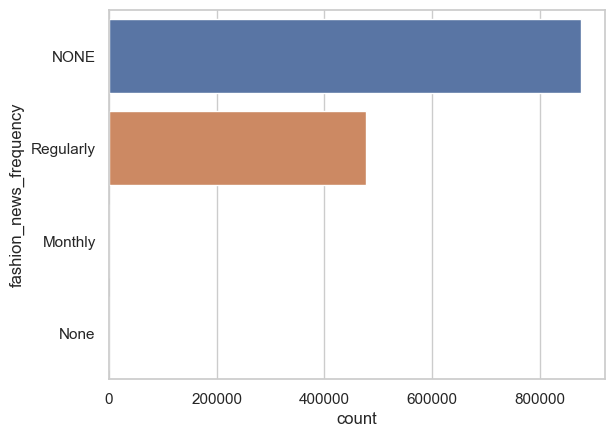

In [31]:
# Distribution of fashion news subscribers
sns.countplot(y='fashion_news_frequency', data=customers)

As summised from the previous graphs and tables, most people who are subscribed to fashion news, also receive it frequently. The majority of people do not subscribe to the fashion news. There is a little bit of noise at play where some people who do not subscribe to the fashion news, still seemingly receive it frequently.

<AxesSubplot: ylabel='age'>

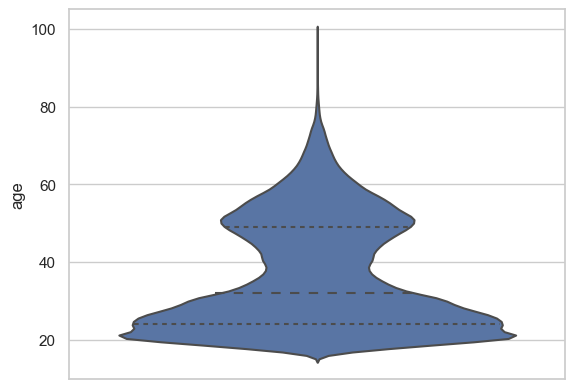

In [32]:
# Age distribution via boxplot
sns.violinplot(y='age', data=customers, inner='quart')

The age distribution proves to be pretty interesting. We see a *few* outliers, particularly on the later end of the age spectrum. Most ages however are centered around two humps: 25 and 50. What this means for the recommendation model is not immediately clear, but it may be helpful to keep in mind.

---
### Transactions
---
<br>

#### Initial Inspection

In [33]:
# Transactions initial inspection
transactions.head(1000)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050830508474576264,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.03049152542372881,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.01523728813559322,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932203389830508,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932203389830508,2
...,...,...,...,...,...
995,2018-09-20,05943a58bd172641b80919a9bdf14012df940800bc74d0...,0661794001,0.15252542372881356,2
996,2018-09-20,05943a58bd172641b80919a9bdf14012df940800bc74d0...,0661794001,0.15252542372881356,2
997,2018-09-20,05943a58bd172641b80919a9bdf14012df940800bc74d0...,0661794002,0.15252542372881356,2
998,2018-09-20,05943a58bd172641b80919a9bdf14012df940800bc74d0...,0661794002,0.15252542372881356,2


**Column descriptions**
- `t_dat`: Date of the transaction (`DATE`)
- `customer_id`: Unique identifier for each customer (`256b HASH DIGEST AS HEX STRING`)
- `article_id`: Unique identifier for each specific article, the product that was bought (`10 DIGIT CODE`)
- `price`: Price of the article, decoupled from valuta, including promotions (`NUMERIC`)
- `sales_channel_id`: Sales channel identifier, whether the product was bought in-store (1) or online (2) (`1 DIGIT`, `CATEGORICAL`)


#### Contents

In [36]:
# Amount of unique products bought
print('Unique products bought: {}'.format(transactions['article_id'].nunique()))

# Total amount of products
print('Total amount of products: {}'.format(articles['article_id'].nunique()))

Unique products bought: 104547
Total amount of products: 105542


This looks correct, almost all products in the catalogue have been bought at least once. Out of curiosity, it might be nice to see which products have never been bought.

In [53]:
# Load image by article_id from path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def load_image(article_id):
    return mpimg.imread('../data/images/{}/{}.jpg'.format(article_id[:3], article_id))

def display_images(images):
    fig, ax = plt.subplots(1, len(images), figsize=(20, 20))
    for i, image in enumerate(images):
        ax[i].imshow(image)
        ax[i].axis('off')
    plt.show()

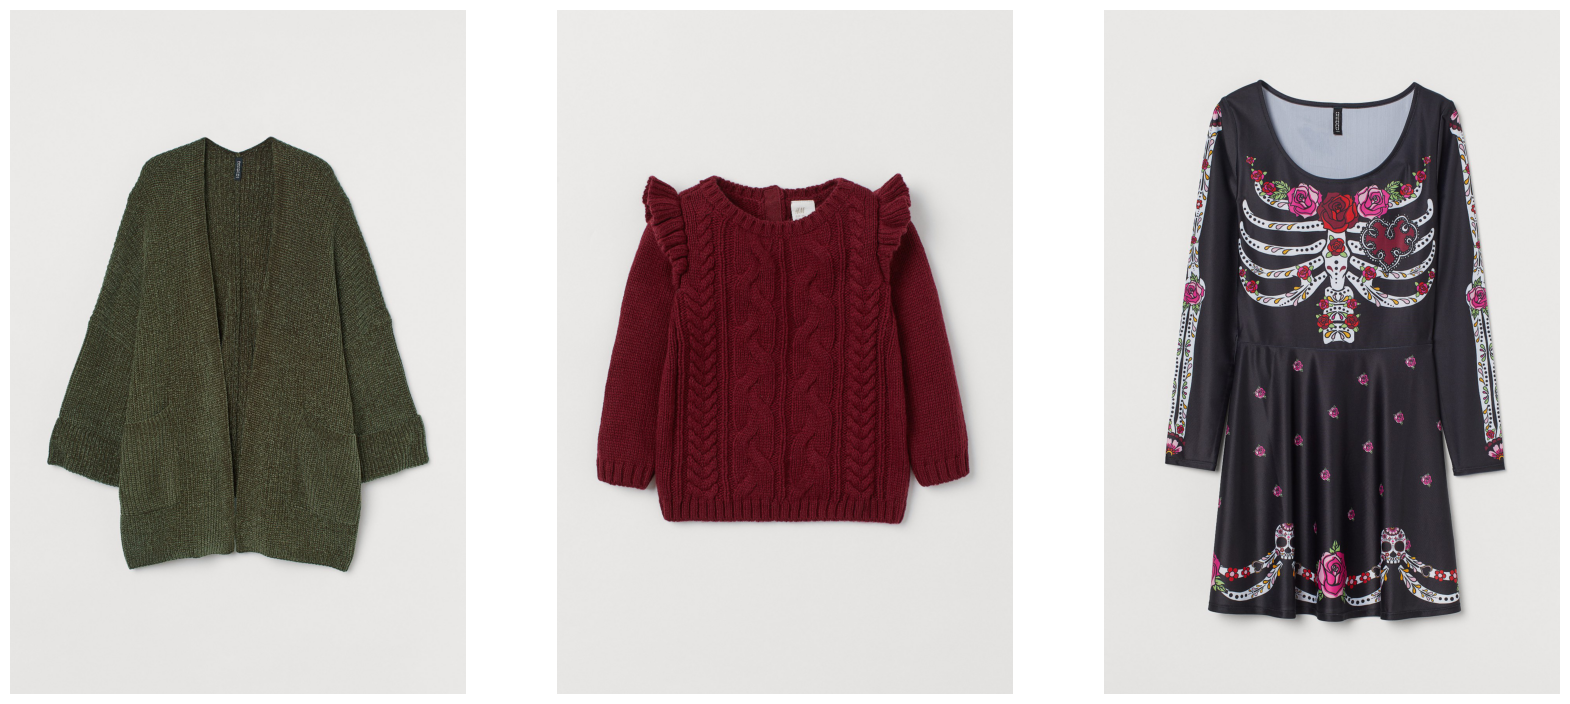

In [56]:
# List three products at random that have never been bought
never_bought = articles[~articles['article_id'].isin(transactions['article_id'])].sample(3)
display_images(never_bought['article_id'].apply(load_image))

Looks like some garments are just not that popular. Is that because they're new to the catalogue, or because they are *just* not popular? Further investigation is required, possibly with the help of a fashion expert.

In [57]:
# All categories of 'sales_channel_id'
transactions['sales_channel_id'].unique()

array(['2', '1'], dtype=object)

As expected, there are only two sales channels: in-store and online, it might be interesting to see if there is a difference in the amount of products bought in-store versus online.

<AxesSubplot: xlabel='count', ylabel='sales_channel_id'>

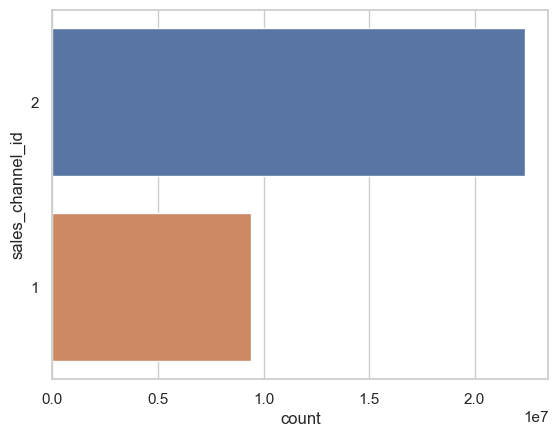

In [58]:
# Amount of products bought in-store versus online
sns.countplot(y='sales_channel_id', data=transactions)

Perhaps curiously, the majority of items are actually bought online (more than double). Do in-store purchases weigh heavier in the recommendation model?